In [1]:
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt  

In [2]:
#load dataset
df_original= pd.read_csv("bank.csv", delimiter=';')
df = df_original
# show top 5 rows of dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# df.y

In [4]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [5]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [6]:
len(df['job'].unique())

12

In [7]:
print("Dataset has {0} rows & {1} columns ".format(df.shape[0], df.shape[1]))

Dataset has 4521 rows & 17 columns 


In [8]:
#missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
# miss

In [9]:
print("\nDrop unwanted columns")
df = df.drop(['marital','education','contact','poutcome', 'day', 'month'], axis = 1)
df.head()


Drop unwanted columns


,age,job,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,unemployed,no,1787,no,no,79,1,-1,0,no
1,33,services,no,4789,yes,yes,220,1,339,4,no
2,35,management,no,1350,yes,no,185,1,330,1,no
3,30,management,no,1476,yes,yes,199,4,-1,0,no
4,59,blue-collar,no,0,yes,no,226,1,-1,0,no


In [10]:
# check datatypes for each column
df.dtypes

age          int64
job         object
default     object
balance      int64
housing     object
loan        object
duration     int64
campaign     int64
pdays        int64
previous     int64
y           object
dtype: object

In [11]:
# descibe our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [12]:
# check for null values
df.isnull().sum()

age         0
job         0
default     0
balance     0
housing     0
loan        0
duration    0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [13]:
df.min()

age             19
job         admin.
default         no
balance      -3313
housing         no
loan            no
duration         4
campaign         1
pdays           -1
previous         0
y               no
dtype: object

In [14]:
# check for th e duplicate values
df.duplicated().sum()


0

In [15]:
# def check_skew(df):
#         """If skewness value lies above +1 or below -1, data is highly skewed. 
#         If it lies between +0.5 to -0.5, it is moderately skewed. 
#         If the value is 0, then the data is symmetric"""
        
#         print("\n Mean: \n",df.mean(), "\n\nSkew : \n",df.skew(), "\n\nMedian: \n", df.median())
#         df.hist()

# check_skew(df) 

In [16]:
# get dummy variables
# df['y_dummy'] = df.y.map({'yes':1, 'no':0})

df.replace(['yes', 'no'],[1,0],inplace= True)
df.head()

,age,job,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,unemployed,0,1787,0,0,79,1,-1,0,0
1,33,services,0,4789,1,1,220,1,339,4,0
2,35,management,0,1350,1,0,185,1,330,1,0
3,30,management,0,1476,1,1,199,4,-1,0,0
4,59,blue-collar,0,0,1,0,226,1,-1,0,0


In [17]:
df = pd.get_dummies(df)

In [18]:
# df.y

In [19]:
# df.drop(['y'], axis = 1, inplace=True)
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,0,1787,0,0,79,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,220,1,339,4,0,...,0,0,0,0,0,1,0,0,0,0
2,35,0,1350,1,0,185,1,330,1,0,...,0,0,1,0,0,0,0,0,0,0
3,30,0,1476,1,1,199,4,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,59,0,0,1,0,226,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


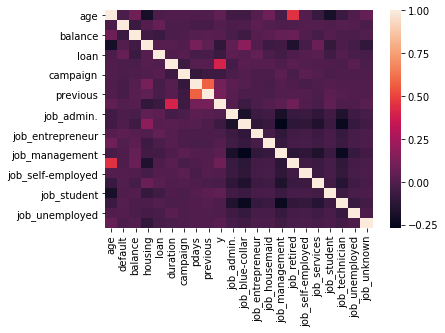

In [20]:
corr = df.corr()
sb.heatmap(corr)

In [21]:
df.corr()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.002367,-0.005148,-0.008894,-0.003511,0.045092,...,0.015638,0.092979,-0.031083,0.453171,0.005505,-0.078352,-0.186691,-0.072723,-0.004259,0.060379
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.011615,-0.012348,-0.026317,-0.026656,0.001303,...,0.037983,0.001298,-0.009598,-0.006784,0.008064,-0.000059,-0.005250,0.009574,0.008799,-0.012039
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.015950,-0.009976,0.009437,0.026196,0.017905,...,0.014523,0.035016,0.059753,0.068974,-0.002064,-0.033758,0.005540,-0.013779,-0.018902,0.002419
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,0.015740,-0.003574,0.116893,0.038621,-0.104683,...,-0.002577,-0.070044,-0.049460,-0.162856,-0.035287,0.075524,-0.091039,-0.012725,-0.038884,-0.100258
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004997,0.017120,-0.031086,-0.022115,-0.070517,...,0.049794,-0.016287,-0.042099,-0.008822,0.006331,0.021806,-0.053891,0.002647,-0.024326,-0.032373
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,1.000000,-0.068382,0.010380,0.018080,0.401118,...,0.016267,0.017588,-0.006884,0.019331,0.000130,-0.001809,-0.008087,-0.020514,0.024507,-0.016668
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,-0.068382,1.000000,-0.093137,-0.067833,-0.061147,...,-0.012910,-0.015051,0.030158,-0.024452,0.032040,0.002964,-0.017734,-0.008999,-0.006255,-0.007136
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,0.010380,-0.093137,1.000000,0.577562,0.104087,...,-0.014704,-0.021278,0.006268,-0.010853,-0.023614,-0.010810,0.008175,-0.002264,-0.005357,-0.003246
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,0.018080,-0.067833,0.577562,1.000000,0.116714,...,-0.013226,-0.017453,0.001987,0.006662,0.005772,-0.018623,0.034265,0.009148,-0.005867,-0.002315
y,0.045092,0.001303,0.017905,-0.104683,-0.070517,0.401118,-0.061147,0.104087,0.116714,1.000000,...,-0.015968,0.004872,0.032634,0.086675,-0.003827,-0.024071,0.047809,-0.010154,-0.007312,0.019886


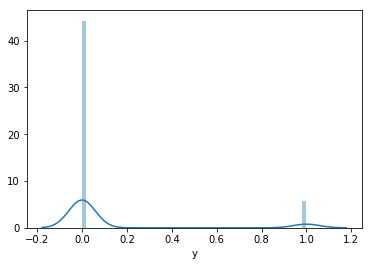

In [22]:
# check skewness for target variable
sb.distplot(df['y'])

In [23]:
# print("\n Mean: \n",df['y'].mean(), "\n\nSkew : \n",df['y'].skew(), "\n\nMedian: \n", df['y'].median())
#         df.hist()
print ("Skewness of y is {}".format(df['y'].skew()))

Skewness of y is 2.4107362647067454


In [24]:
print (corr['y'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['y'].sort_values(ascending=False)[-10:]) #last 5 values`


y                    1.000000
duration             0.401118
previous             0.116714
pdays                0.104087
job_retired          0.086675
job_student          0.047809
age                  0.045092
job_management       0.032634
job_unknown          0.019886
balance              0.017905
job_admin.           0.006568
job_housemaid        0.004872
default              0.001303
job_self-employed   -0.003827
job_unemployed      -0.007312
Name: y, dtype: float64 

----------------------
default              0.001303
job_self-employed   -0.003827
job_unemployed      -0.007312
job_technician      -0.010154
job_entrepreneur    -0.015968
job_services        -0.024071
campaign            -0.061147
job_blue-collar     -0.068147
loan                -0.070517
housing             -0.104683
Name: y, dtype: float64


In [25]:
#now transforming the target variable
def remove_skew():
    print("\nSkewness for y")
#         df['x2'] = (np.square(df['x2']))
    df['y'] = np.log(df['y'])
    print('Skewness is :', df['y'].skew())
    sb.distplot(df['y'])
    plt.show()
# target = np.log(df['y'])
# print ('Skewness is', target.skew())
# sb.distplot(target)
# remove_skew()

In [26]:
# check minimum values in each column
# df.min()

In [27]:
#replace all zeroes with mean of that column
df.replace(0, df.mean(), inplace = True)

In [28]:
df.min()

age                    19.000000
default                 0.016810
balance             -3313.000000
housing                 0.566025
loan                    0.152842
duration                4.000000
campaign                1.000000
pdays                  -1.000000
previous                0.542579
y                       0.115240
job_admin.              0.105729
job_blue-collar         0.209246
job_entrepreneur        0.037160
job_housemaid           0.024773
job_management          0.214333
job_retired             0.050874
job_self-employed       0.040478
job_services            0.092236
job_student             0.018580
job_technician          0.169874
job_unemployed          0.028312
job_unknown             0.008405
dtype: float64

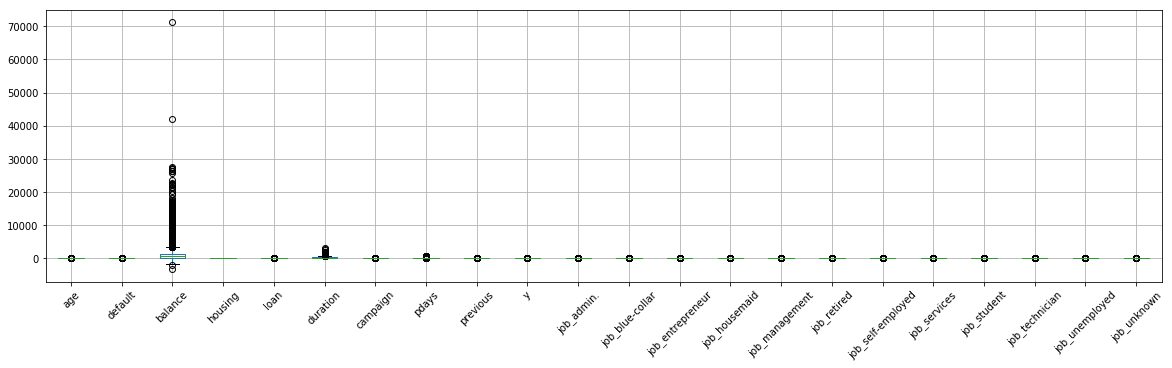

In [29]:
# check for ouliers
df.boxplot(rot=45, figsize=(20,5))
# sb.boxplot(data=df )
plt.show()

<Figure size 432x288 with 0 Axes>

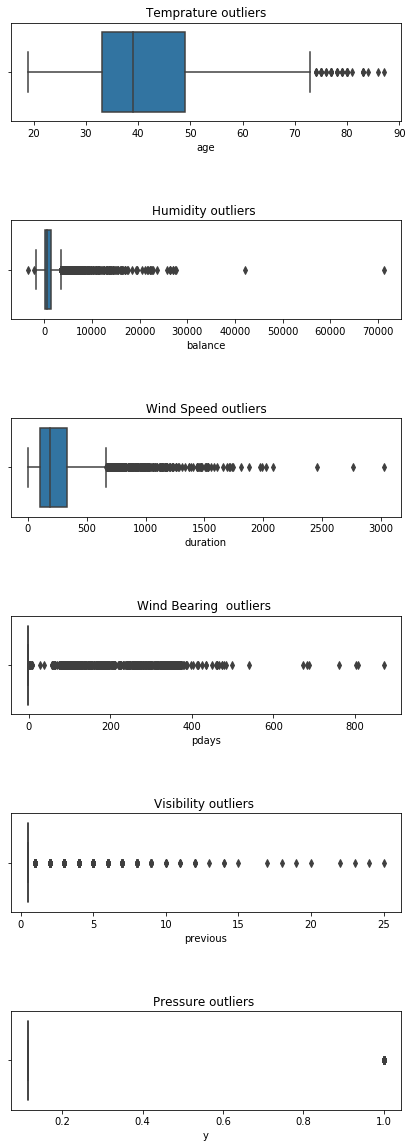

In [30]:
def check_outliers():
    # Create a figure instance, and the two subplots
    fig = plt.figure()
       # here we show 4 axes
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(7, 20))

    sb.boxplot(df['age'], ax = ax1)
    ax1.set_title("Temprature outliers")
       
    sb.boxplot(df['balance'], ax = ax2)
    ax2.set_title("Humidity outliers ")
       
    sb.boxplot(df['duration'], ax = ax3)
    ax3.set_title(" Wind Speed outliers ")
       
    sb.boxplot(df['pdays'], ax = ax4)
    ax4.set_title("Wind Bearing  outliers ")
       
    sb.boxplot(df['previous'], ax = ax5)
    ax5.set_title("Visibility outliers ")
       
    sb.boxplot(df['y'], ax = ax6)
    ax6.set_title("Pressure outliers ")
       
    plt.subplots_adjust(hspace=1)
    plt.show()
    
check_outliers()

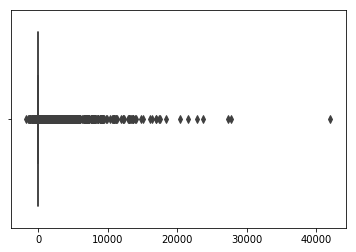

In [31]:
def remove_outlier(df):
       
        low = .2
        high = .75
        quant_df = df.quantile([low, high])
        for name in list(df.columns):
            if ptypes.is_numeric_dtype(df[name]):
                df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
                sb.boxplot(df)
remove_outlier(df)


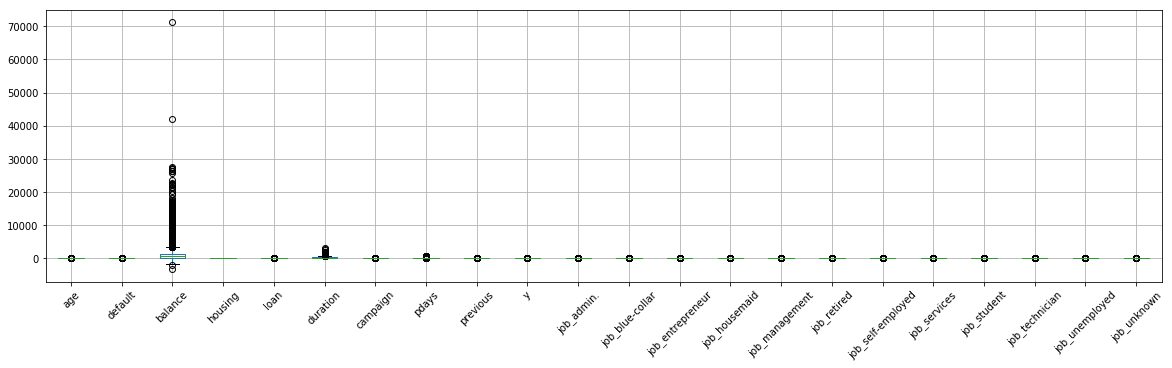

In [32]:
# check for ouliers
df.boxplot(rot=45, figsize=(20,5))
# sb.boxplot(data=df )
plt.show()

In [33]:
print("\n Mean: \n",df.mean(), "\n\nSkew : \n",df.skew(), "\n\nMedian: \n", df.median())



 Mean: 
 age                    41.170095
default                 0.033338
balance              1534.997753
housing                 0.811666
loan                    0.282324
duration              263.961292
campaign                2.793630
pdays                  39.766645
previous                0.987227
y                       0.217200
job_admin.              0.200279
job_blue-collar         0.374708
job_entrepreneur        0.072939
job_housemaid           0.048933
job_management          0.382728
job_retired             0.099159
job_self-employed       0.079317
job_services            0.175965
job_student             0.036815
job_technician          0.310891
job_unemployed          0.055823
job_unknown             0.016740
dtype: float64 

Skew : 
 age                   0.699501
default               7.519405
balance               6.684854
housing              -0.266522
loan                  1.930177
duration              2.772420
campaign              4.743914
pdays                

In [34]:
# do feature scale by min max normalization
def feature_scaling(df):
#     print("\n By Z score Method(Standerdization)  ")
#     df = np.divide((df - df.mean()),df.std())
    for name in df.columns:
        df[name] = (df[name] - df[name].min()) / (df[name].max()-df[name].min())
    print(df.head())
feature_scaling(df)

        age  default   balance  housing  loan  duration  campaign     pdays  \
0  0.161765      0.0  0.068455      0.0   0.0  0.024826  0.000000  0.000000   
1  0.205882      0.0  0.108750      1.0   1.0  0.071500  0.000000  0.389908   
2  0.235294      0.0  0.062590      1.0   0.0  0.059914  0.000000  0.379587   
3  0.161765      0.0  0.064281      1.0   1.0  0.064548  0.061224  0.000000   
4  0.588235      0.0  0.063565      1.0   0.0  0.073486  0.000000  0.000000   

   previous    y  ...  job_entrepreneur  job_housemaid  job_management  \
0  0.000000  0.0  ...               0.0            0.0             0.0   
1  0.141365  0.0  ...               0.0            0.0             0.0   
2  0.018703  0.0  ...               0.0            0.0             1.0   
3  0.000000  0.0  ...               0.0            0.0             1.0   
4  0.000000  0.0  ...               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \


In [35]:
# seperate data set
def features(df):
    y_new = df.y
#     y.head()
    df = df.drop('y', axis = 1)
    print("Seperate y column from dataset")
    return df, y_new
df, y_new = features(df)

Seperate y column from dataset


In [36]:
print('Head for df')
df.head()

Head for df


,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.161765,0.0,0.068455,0.0,0.0,0.024826,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.205882,0.0,0.108750,1.0,1.0,0.071500,0.000000,0.389908,0.141365,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.059914,0.000000,0.379587,0.018703,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.161765,0.0,0.064281,1.0,1.0,0.064548,0.061224,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,0.0,0.063565,1.0,0.0,0.073486,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print('Head for new Y')
y_new.head()

Head for new Y


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: y, dtype: float64

In [38]:
def split_data(df):
    # 70 % training datset
    train_per = int(0.70*len(df))
    print("Train dataset:", train_per)
    # 30% test dataset
    test_per = len(df)-train_per
    print("Test dataset:", test_per)
    
    print("\nConvert pandas datafrem into numpy")
    x_train_data = np.array(df[:train_per])   
    x_test_data  = np.array(df[:test_per])
    
    
    train_per_y = int(0.70*len(y_new))
    test_per_y = len(y_new)-train_per_y

    
    y_train_data = np.array(y_new[:train_per_y])
    y_test_data = np.array(y_new[:test_per_y])
    
    #reshpe (1357,) to (1357,1) for train and test dataset
    y_test_data = y_test_data.reshape(-1,1)
    y_train_data = y_train_data.reshape(-1,1)
        
    
    print("\nX train data shape:", x_train_data.shape)
    print("y train data shape:", y_train_data.shape)
    print("\nX test data shape:", x_test_data.shape)
    print("y test data shape:", y_test_data.shape)

    return x_train_data, y_train_data, x_test_data, y_test_data

x_train_data, y_train_data, x_test_data, y_test_data = split_data(df)        

Train dataset: 3164
Test dataset: 1357

Convert pandas datafrem into numpy

X train data shape: (3164, 21)
y train data shape: (3164, 1)

X test data shape: (1357, 21)
y test data shape: (1357, 1)


In [47]:
class Logistic:
    def __init__(self):
        # Learning Rate
        self.l_rate = 0.060

        # Total iterations
        self.epoch = 60000
        
    def gradient_descent(self, x_data_train, y_data_train, theta_vector):       
        print("X train & Y train & theta vector", x_data_train.shape, y_data_train.shape, theta_vector.shape)
        for i in range(self.epoch):
            z = np.dot(x_data_train, theta_vector)
            sigmoid = (1 / (1 + np.exp(-z)))
            a = sigmoid - y_data_train
            temp = np.dot( x_data_train.T, a)
            temp = np.dot(temp, self.l_rate) / len(x_data_train)
            theta_vector = theta_vector - temp
            
#             temp1 = np.multiply(y_train_data.T, np.log(sigmoid))  #(1, 3164)
#             temp2 = np.multiply((1 - y_train_data.T),np.log(np.abs(1- sigmoid)))  # (1, 3164)
#             cost = temp1 + temp2
            
        print("\n\nhypo_multiplication shape",z.shape)
        print("sigmoid shape", sigmoid.shape)
        print("error shape", a.shape)
        print("temp", temp.shape)
        
        print("theta shape", theta_vector.shape)
        
#         print("\nTemp1 shape:", temp1.shape)
#         print("Temp2 shape:", temp2.shape)
#         print("Cost shape:", cost.shape)
        
        return theta_vector

    def prediction(self, x_data_test, theta_vector):
        print("\n Prediction function")
        print("x : theta",x_data_test.shape, theta_vector.shape )
              
        y_prediction = np.zeros((x_data_test.shape[0], 1), dtype=float)
        print("y_prediction:",y_prediction.shape)
#         x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))
        z = np.dot(x_data_test, theta_vector)
        sigmoid = np.array(1 / (1 + np.exp(-z)))

        for i in (range(0, len(sigmoid))):
            if round(sigmoid[i][0], 2) <= 0.5:
                y_prediction[i][0] = 0
            else:
                y_prediction[i][0] = 1
#         print("final shape......", y_prediction.shape)
#         y_prediction = np.reshape(y_prediction, (len(y_prediction), 1))
#         print("final shape", y_prediction.shape)
        return y_prediction

#     def accuracy(self, y_data_test, y_pred_test):
#         total_error = 0
#         error = []
#         for i in range(0, len(y_data_test)):
#             total_error = total_error + abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
#         total_error = (total_error / len(y_data_test))
#         accuracy = 1 - total_error
#         return accuracy * 100
    


def main(df, x_train_data, y_train_data, x_test_data,y_test_data ):
    # class obj created
    

    obj = Logistic()
    
    
    print("X train shape original", x_train_data.shape)
    
    x_col = 21
    theta_vector = np.full((x_col +1 ,1), 0.05)
#     theta_vector = np.zeros(((x_col + 1), 1), dtype='f')
   
    # append new col bcoz we have 6 features as, x1,x2,....x6 but 7 thetas so add new x(np.opnes)
    # unction is used to stack 1-D arrays as columns into a 2-D array
    # Stacking the two arrays   
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    print("x train data .....", x_train_data.shape)
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))

    theta = obj.gradient_descent(x_train_data, y_train_data, theta_vector)
    print(theta.shape)
    #y prediction 
    y_test_prediction = obj.prediction(x_test_data, theta)
#     print("........x test data", x_test_data.shape)
  
    y_train_prediction = obj.prediction(x_train_data, theta)
#     print("\n\n after function")
#     print("y train shape",y_train_data.shape)
#     print("y_train_prediction shape",y_train_prediction.shape)

# #     accuracy(y_test_data, y_predict)

#     print("y_test_prediction shape",y_test_prediction.shape)
#     print("y test shape",y_test_data.shape)
    
    print("\n\nAccuracy : ")
    train_acc = round(float(100 - np.mean(np.abs(y_train_prediction - y_train_data)) * 100))
    test_acc = round(float(100 - np.mean(np.abs(y_test_prediction - y_test_data)) * 100))
    print("Train dataset accuracy: ", train_acc, "Test dataset accuracy:", test_acc)

main(df, x_train_data,y_train_data,x_test_data,y_test_data)


X train shape original (3164, 21)
x train data ..... (3164, 22)
X train & Y train & theta vector (3164, 22) (3164, 1) (22, 1)


hypo_multiplication shape (3164, 1)
sigmoid shape (3164, 1)
error shape (3164, 1)
temp (22, 1)
theta shape (22, 1)
(22, 1)

 Prediction function
x : theta (1357, 22) (22, 1)
y_prediction: (1357, 1)

 Prediction function
x : theta (3164, 22) (22, 1)
y_prediction: (3164, 1)


Accuracy : 
Train dataset accuracy:  89 Test dataset accuracy: 88


In [40]:
# class Logistic:
#     def __init__(self):
#          # learning_rate is a alpha
#         self.learning_rate = 0.08
#         self.epoch = 10000
#         self.ncols=22
        
#     def gradient_descent(self,x_train_data, y_train_data, theta_vector):
#         print("\ntheat shape ",theta_vector.shape) # (22, 1)

#         print("x_train shape ",x_train_data.shape) # (3164, 22)
        
# #         plt.figure used to plot graphs
# #         fig = plt.figure()
# #         fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
# #         fig, ax2 = plt.subplots(nrows=1,ncols=1, figsize=(5, 20))
    
#         size = len(x_train_data)
#         cost = 0
#         cf = 0.0
#         cost_temp = 0.0
#         error = 0.0
#         m = x_train_data.shape[0]
#         for iteration in range(self.epoch):
            
#             hypo = np.dot(theta_vector.T,x_train_data.T)    # (1, 3164)
# #             sigmoid = np.divide(1, 1+np.power(np.e,np.multiply(-1,hypo))) # (1, 3164)
#             sigmoid = np.divide(1, 1 + np.exp(-hypo)) # (1, 3164)

#             error = np.subtract(sigmoid,y_train_data.T) #(1, 3164)
#             temp = np.dot(error,x_train_data)  #(1, 22)
#             theta = np.subtract(theta_vector.T,np.dot((self.learning_rate / m ),temp))   #(1, 22)  

#             #print(y_train_data.shape, sigmoid.shape)  #(3164, 1) (1, 3164)
#             # brodcast here , use np.multiply
#             temp1 = np.multiply(y_train_data.T, np.log(sigmoid))  #(1, 3164)
#             temp2 = np.multiply((1 - y_train_data.T),np.log(np.abs(1- sigmoid)))  # (1, 3164)

            
# #             m = x_train_data.shape[0]
# #             total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
# #             cost = -(1 / m) * np.sum(temp1 + temp2)
#             cost = -(1 / m) * (temp1 + temp2 )       
# #             cost = temp1 + temp2   
#         print("\n\n")
#         print(hypo)
#         print("\nhypo_multiplication shape",hypo.shape)
#         print("\n\n")
#         print(sigmoid)
#         print("sigmoid shape", sigmoid.shape)
#         print("\n\n")
#         print(error)
#         print("error shape", error.shape)
#         print("\n\n")
#         print(temp)
#         print("temp", temp.shape)
#         print("\n\n")
#         print(theta)
#         print("theta shape", theta.shape)
        
#         print("\nTemp1 shape:", temp1.shape)
#         print("Temp2 shape:", temp2.shape)
#         print("Cost shape:", cost.shape)                                     
                                       
#         return theta, cost
    
#     def prediction(self, theta_0, x_test_data):
# #         x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
#         prediction = np.zeros((x_test_data.shape[0], 1), dtype=float)
#         print("\nx_test_data and prediction shape ",x_test_data.shape, prediction.shape)
#         print(theta_0.shape)
        
#         z = np.dot(x_test_data, theta_0.T)
#         sigmoid = 1 / (1 + np.exp(-z))
# #         sigmoid = np.divide(1, 1+np.power(np.e,np.multiply(-1,z)))

#         print("z shape and sigmoid shape",z.shape, sigmoid.shape)
# #         sigmoid = [sigmoid]
# #         print(sigmoid)
#         print("Sig length :", len(sigmoid))
#         count_0 = 0
#         count_1 = 0
        
#         for i in range(len(sigmoid)):
#             if round(sigmoid[i][0], 2) <= 0.5:
#                 prediction[i][0] = 1
# #                 prediction[i] = 1
#                 count_1 +=1
#             else:
#                 prediction[i][0] = 0
# #                 prediction[i] = 0
#                 count_0 +=1
#         print("count of 1 : ", count_1, "0 : ", count_0)   
#         prediction = np.reshape(prediction, (len(prediction), 1))
#         return prediction
   
#     def accuracy(self, y_test_data, y_predict):
#         print("y", y_test_data.shape)
#         print("y_pred", y_predict)
#         total_error = 0
#         for i in range(0, len(y_test_data)):
#             total_error += abs((y_predict[i] - y_test_data[i]) / y_test_data[i])
#         total_error = (total_error / len(y_test_data))
#         accuracy = 1 - total_error
#         return accuracy * 100



# def main(df, x_train_data, y_train_data, x_test_data,y_test_data ):
#     # class obj created
#     obj = Logistic()
    
#     print("X train shape original", x_train_data.shape)
    
#     x_col = 21
#     theta_vector = np.full((x_col +1 ,1), 0.05)
# #     theta_vector = np.zeros(((x_col + 1), 1), dtype='f')
   
#     # append new col bcoz we have 6 features as, x1,x2,....x6 but 7 thetas so add new x(np.opnes)
#     # unction is used to stack 1-D arrays as columns into a 2-D array
#     # Stacking the two arrays   
#     x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    
#     x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))

#     theta, cost = obj.gradient_descent(x_train_data, y_train_data, theta_vector)
    
#     #y prediction 
#     y_test_prediction = obj.prediction(theta, x_test_data)
#     y_train_prediction = obj.prediction(theta, x_train_data)
    
# #     accuracy(y_test_data, y_predict)
#     print("\n\nAccuracy : ")
#     train_acc = round(float(100 - np.mean(np.abs(y_train_prediction - y_train_data)) * 100))
#     test_acc = round(float(100 - np.mean(np.abs(y_test_prediction - y_test_data)) * 100))
#     print("Train dataset accuracy: ", train_acc, "Test dataset accuracy:", test_acc)

# main(df, x_train_data,y_train_data,x_test_data,y_test_data)
